In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Part I**

#**K-Nearest Neighbors (KNN)**

The KNN model is a supervised machine learning model. It is also one of the simpler models too.

KNN algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

##**Mathematical Definition of Nearest Neighbors**

The definition of nearest neighbors is based on the computation of the Euclidean distance from the new data point to each of the existing data
$$ d(p,q) = \sqrt {{{({p_1} - {q_1})}^2} + {{({p_2} - {q_2})}^2} + ...{{({p_n} - {q_n})}^2}}$$

When we use the kNN algorithm, we need to identify the closest neighbors. Once we have identified the k neighbors that are closest to our new data point, we do not yet have a prediction. There is one step remaining to convert the multiple neighbors into one prediction. There are two prevalent methods for it.


1.The first method is to take the average of the target value of the k nearest neighbors. This average is then used as the prediction.

2.The second method is to take the weighted average of the k nearest neighbors and use their distances as the inverse weight so that closer points are weighted heavier in the prediction.



**Deciding on the Number of Neighbors k**

How many nearest neighbors should we include in the prediction? The value of k decides this. To apply this, let us see two cases – one nearest neighbor and three nearest neighbors – and see the difference in prediction. The two are given in the figure below:

In [ ]:
import matplotlib.pyplot as plt

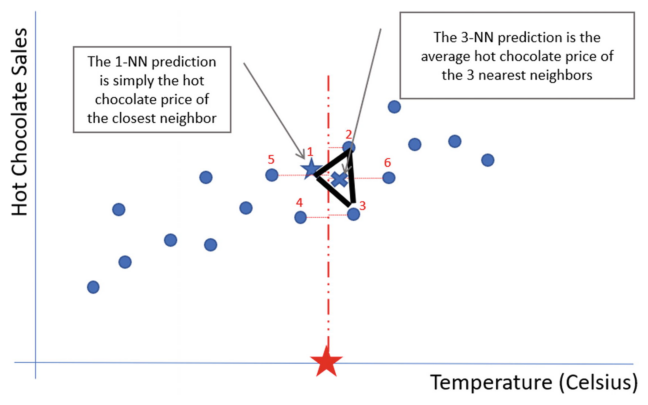

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/1.jpg')
plt.figure(figsize = (300,5))
plt.axis('off')
plt.imshow(image1);

To define an appropriate k:

* Cross-Validation: Utilize techniques like cross-validation to test different k values and select the one that maximizes the model’s performance. This helps ensure that the chosen k generalizes well to unseen data.

* Elbow Method: Plot the error rate or accuracy against various k values and identify the point of diminishing returns, often referred to as the “elbow.” This can help pinpoint a suitable k value.

* Square Root of N rule: This rule offers a quick and practical way to determine an initial k value for your KNN model, especially when no other domain-specific knowledge or optimization techniques are readily available. The rule suggests setting k to the square root of N. Here, N represents the total number of data points in the dataset.

##**Mathematical Example**

The table below represents our data set. We have two columns — Brightness and Saturation.

Each row in the table has a class of either Red or Blue.

Let's assume the value of K is 3(use square root rule).

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [40, 50, 60, 10, 70, 60, 25],
                   'SATURATION':[20, 50, 90, 25, 70, 10, 80],
                   'CLASS': ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue']})
df

,BRIGHTNESS,SATURATION,CLASS
0,40,20,Red
1,50,50,Blue
2,60,90,Blue
3,10,25,Red
4,70,70,Blue
5,60,10,Red
6,25,80,Blue


Here's the new data entry:

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [20],
                   'SATURATION':[35],
                   'CLASS': ['?']})
df

,BRIGHTNESS,SATURATION,CLASS
0,20,35,?


We have a new entry but it doesn't have a class yet. To know its class, we have to calculate the distance from the new entry to other entries in the data set using the Euclidean distance formula:

$$ d(X, Y) = \sqrt {{{({X_1} - {X_1})}^2} + {{({Y_2} - {Y_2})}^2}}$$

Where:

* X₂ = New entry's brightness (20).
* X₁= Existing entry's brightness.
* Y₂ = New entry's saturation (35).
* Y₁ = Existing entry's saturation.



Distance 1

For the first row, d1:

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [40],
                   'SATURATION':[20],
                   'CLASS': ['Red']})
df

,BRIGHTNESS,SATURATION,CLASS
0,40,20,Red


$$ d_{1} = \sqrt {{{({20} - {40})}^2} + {{({35} - {20})}^2}}$$
$$= \sqrt{400 + 25} $$
$$= \sqrt{625} $$
$$25$$

We now know the distance from the new data entry to the first entry in the table. Let's update the table.

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [40, 50, 60, 10, 70, 60, 25],
                   'SATURATION':[20, 50, 90, 25, 70, 10, 80],
                   'CLASS': ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue'],
                   'DISTANCE' : [25, '?', '?', '?', '?', '?', '?']})
df

,BRIGHTNESS,SATURATION,CLASS,DISTANCE
0,40,20,Red,25
1,50,50,Blue,?
2,60,90,Blue,?
3,10,25,Red,?
4,70,70,Blue,?
5,60,10,Red,?
6,25,80,Blue,?


Distance 2

For the second row, d2:

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [50],
                   'SATURATION':[50],
                   'CLASS': ['Blue']})
df

,BRIGHTNESS,SATURATION,CLASS
0,50,50,Blue


$$ d_{1} = \sqrt {{{({20} - {50})}^2} + {{({35} - {50})}^2}}$$
$$= \sqrt{900 + 225} $$
$$= \sqrt{1125} $$
$$33.54$$

Here's the table with the updated distance:

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [40, 50, 60, 10, 70, 60, 25],
                   'SATURATION':[20, 50, 90, 25, 70, 10, 80],
                   'CLASS': ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue'],
                   'DISTANCE' : [25, 33.54, '?', '?', '?', '?', '?']})
df

,BRIGHTNESS,SATURATION,CLASS,DISTANCE
0,40,20,Red,25
1,50,50,Blue,33.54
2,60,90,Blue,?
3,10,25,Red,?
4,70,70,Blue,?
5,60,10,Red,?
6,25,80,Blue,?


Distance 3

For the third row, d3:

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [60],
                   'SATURATION':[90],
                   'CLASS': ['Blue']})
df

,BRIGHTNESS,SATURATION,CLASS
0,60,90,Blue


$$ d_{1} = \sqrt {{{({20} - {60})}^2} + {{({35} - {90})}^2}}$$
$$= \sqrt{1600 + 3025} $$
$$= \sqrt{4625} $$
$$68.01$$

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [40, 50, 60, 10, 70, 60, 25],
                   'SATURATION':[20, 50, 90, 25, 70, 10, 80],
                   'CLASS': ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue'],
                   'DISTANCE' : [25, 33.54, 68.01, '?', '?', '?', '?']})
df

,BRIGHTNESS,SATURATION,CLASS,DISTANCE
0,40,20,Red,25
1,50,50,Blue,33.54
2,60,90,Blue,68.01
3,10,25,Red,?
4,70,70,Blue,?
5,60,10,Red,?
6,25,80,Blue,?


Here's what the table will look like after all the distances have been calculated:

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [40, 50, 60, 10, 70, 60, 25],
                   'SATURATION':[20, 50, 90, 25, 70, 10, 80],
                   'CLASS': ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue'],
                   'DISTANCE' : [25, 33.54, 68.01, 10, 61.03, 47.17, 45]})
df

,BRIGHTNESS,SATURATION,CLASS,DISTANCE
0,40,20,Red,25.00
1,50,50,Blue,33.54
2,60,90,Blue,68.01
3,10,25,Red,10.00
4,70,70,Blue,61.03
5,60,10,Red,47.17
6,25,80,Blue,45.00


Let's rearrange the distances in ascending order:

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [10, 40, 50, 25, 60, 70, 60],
                   'SATURATION':[25, 20, 50, 80, 10, 70, 90],
                   'CLASS': ['Red', 'Red', 'Blue', 'Blue', 'Red', 'Blue', 'Blue'],
                   'DISTANCE' : [10, 25,  33.54, 45, 47.17, 61.03, 68.01]})
df

,BRIGHTNESS,SATURATION,CLASS,DISTANCE
0,10,25,Red,10.00
1,40,20,Red,25.00
2,50,50,Blue,33.54
3,25,80,Blue,45.00
4,60,10,Red,47.17
5,70,70,Blue,61.03
6,60,90,Blue,68.01


Since we chose 3 as the value of K, we'll only consider the first five rows. That is:

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [10, 40, 50],
                   'SATURATION':[25, 20, 50],
                   'CLASS': ['Red', 'Red', 'Blue'],
                   'DISTANCE' : [10, 25,  33.54]})
df

,BRIGHTNESS,SATURATION,CLASS,DISTANCE
0,10,25,Red,10.00
1,40,20,Red,25.00
2,50,50,Blue,33.54


As you can see above, the majority class within the 3 nearest neighbors to the new entry is Red. Therefore, we'll classify the new entry as Red.

In [ ]:
df = pd.DataFrame({'BRIGHTNESS': [40, 50, 60, 10, 70, 60, 25, 20],
                   'SATURATION':[20, 50, 90, 25, 70, 10, 80, 35],
                   'CLASS': ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Red']})
df

,BRIGHTNESS,SATURATION,CLASS
0,40,20,Red
1,50,50,Blue
2,60,90,Blue
3,10,25,Red
4,70,70,Blue
5,60,10,Red
6,25,80,Blue
7,20,35,Red


Source:

https://www.freecodecamp.org/news/k-nearest-neighbors-algorithm-classifiers-and-model-example/

##**Code Example**

###**1.Import libraries.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

###**2. Import the traffic data.**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI/Assignment/Assignment_2/datasets/Metro_Interstate_Traffic_Volume.csv')

###**3. The seasonality variables are necessary for the modeling here. We create Year, Month, Weekday, Hour, IsHoliday.**

In [ ]:
data['year'] = data['date_time'].apply(lambda x: x[:4])
data['month'] = data['date_time'].apply(lambda x: x[5:7])
data['weekday'] = pd.to_datetime(data['date_time']).apply(lambda x: x.weekday())
data['hour'] = pd.to_datetime(data['date_time']).apply(lambda x: x.hour)
data['isholiday'] = (data['holiday'] == 'None').apply(float)


###**4A. Feature engineering to create the additional explanatory variables.**
###**4B. Split the data into train and test and fit a default kNN model.**
###**4C. Obtain the R2**


The R-squared (R2) score, also known as the coefficient of determination, is a statistical measure used to evaluate the goodness of fit of a regression model. It provides insights into how well the model explains the variability in the dependent variable (target) based on the independent variables (features).

Mathematically, the R2 score is defined as:
$$R^2=1−\dfrac{Total sum of squares (SST)}{Sum of squaredresiduals (SSR)}$$​

In [ ]:
X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)
my_dt = KNeighborsRegressor()
my_dt.fit(X_train, y_train)
fcst = my_dt.predict(X_test)
print(r2_score(list(y_test), list(fcst)))


0.970238265560862


###**5. Verify our results visually.**

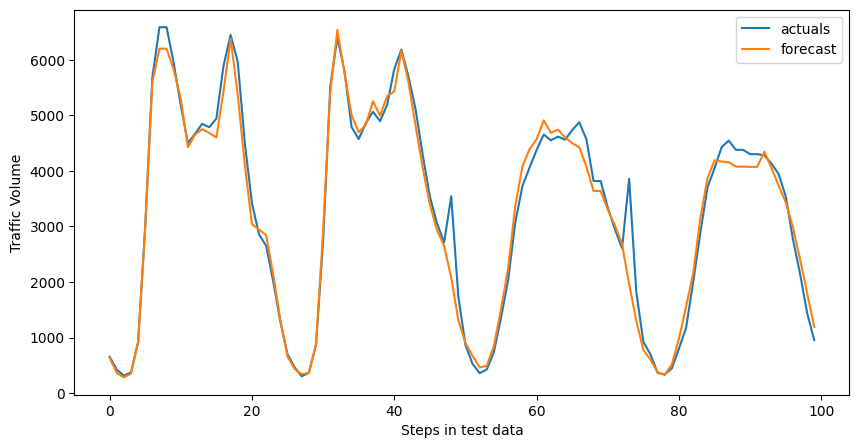

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(y_test))
plt.plot(list(fcst))
plt.legend(['actuals', 'forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()


#**Part II**
#**Support Vector Machines Algorithm**

###**Recap on logistic regression and perceptron algorithm**

Perceptron algorithm

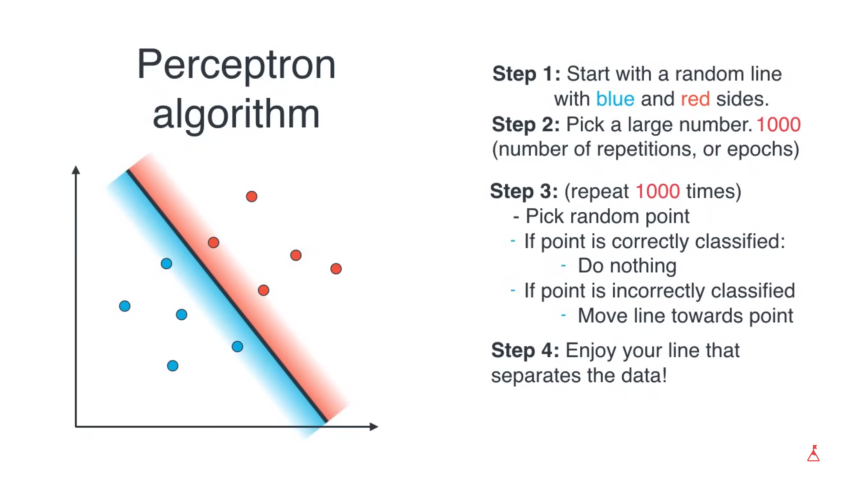

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/10.png')
plt.figure(figsize = (300,6))
plt.axis('off')
plt.imshow(image1);

###**What is that SVM does best?**

We have 2 lines that seperate data here. Which line is better?

The best one is the line on the left, and the one in the right is not so good, even though they both seperate the data.

The one in the left seperates the points such that it is really far away from the points whereas the one in the right is really close to 2 of the points, so if you wiggle the line on the right around you may miss one of the points and yo may miss classify them.

So we have to train out model to pick the left line.

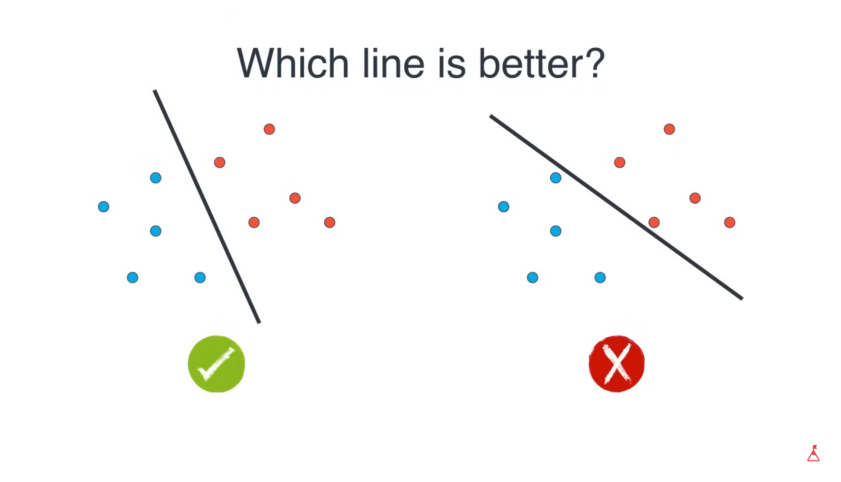

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/11.png')
plt.figure(figsize = (300,6))
plt.axis('off')
plt.imshow(image1);

###**SVM algorithm**

In SVM algorithm, we not just find one line but find two lines that are spaced aparta possible from each other.

For the case on the left, we can actually have them far from each other, on the other hand if we do this with the line on the right the farthest we can get is 2 lines that are pretty close.

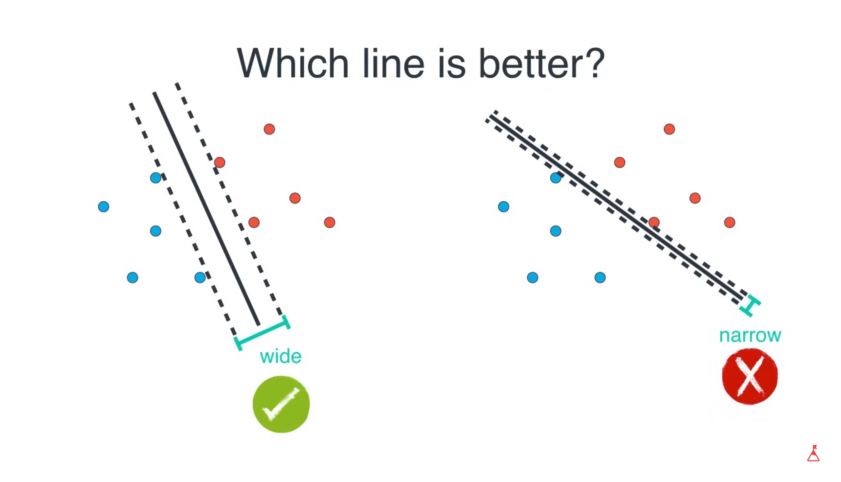

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/12.png')
plt.figure(figsize = (300,6))
plt.axis('off')
plt.imshow(image1);

**How do we train an algorithm to find two lines as far from each other that are parallel and still splits our data?**

1. We start by dropping a random line that does not do a very good job necessarily.
2. We draw two parallel lines around it at some small random distances.
3. We repeat steps we done in perceptron algorithm, and at every step we are going to seperate lines just a little bit

Source:

https://www.youtube.com/watch?v=Lpr__X8zuE8

1. The fundamental idea behind Support Vector Machines is to fit the largest possible street/margin between the decision boundary that separates the two classes and the training instances. When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and having the widest possible margin. Another key idea is to use kernels when training on nonlinear datasets.

**What is Kernel Trick ?**

The “Kernel Trick” is a method used in Support Vector Machines (SVMs) to convert data (that is not linearly separable) into a higher-dimensional feature space where it may be linearly separated.

Consider a binary classification problem where we have two classes of data points: red and blue. The data is not linearly separable in the 2D space. We can see this in the plot below:

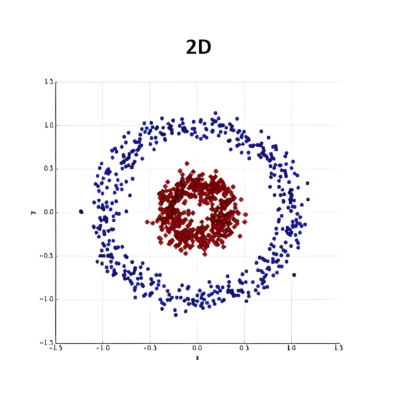

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/13.png')
plt.figure(figsize = (300,5))
plt.axis('off')
plt.imshow(image1);

By applying the kernel trick to the data, we transform it into a higher-dimensional feature space where the data becomes linearly separable. We can see this in the plot below, where the red and blue data points have been separated by a hyperplane in the 3D space:

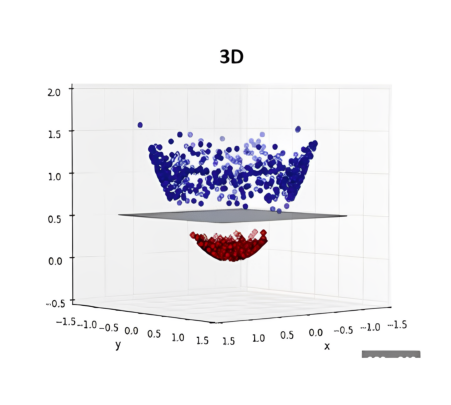

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/14.png')
plt.figure(figsize = (300,5))
plt.axis('off')
plt.imshow(image1);

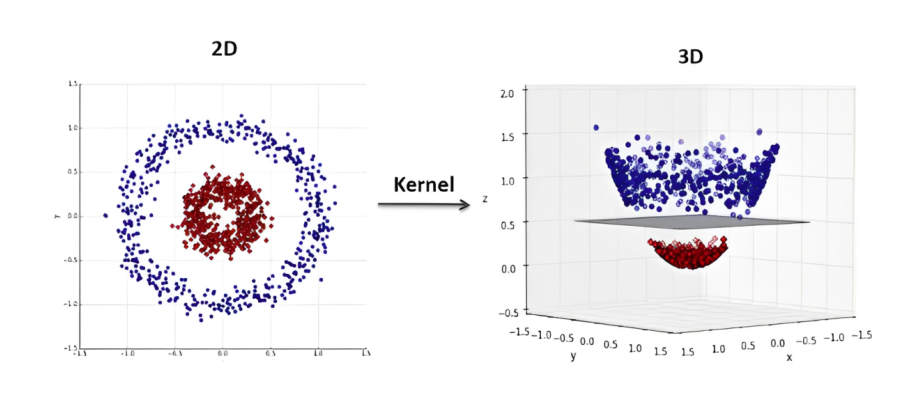

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/15.png')
plt.figure(figsize = (300,5))
plt.axis('off')
plt.imshow(image1);

As we can see, the kernel trick has helped us find a solution for a non-linearly separable dataset.

Source:

https://medium.com/@Suraj_Yadav/what-is-kernel-trick-in-svm-interview-questions-related-to-kernel-trick-97674401c48d

2. The decision boundary(hyperplane) is entirely determined by the support vectors(These are the points that are closest to the hyperplane.). Any instance that is not a support vector (i.e., is off the street/margin) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street, they will not affect the decision boundary. Computing the predictions only involve the support vectors, not the whole training set.

3. SVMs will fit the largest possible “street” between the classes (see the first answer), so if the training set is not scaled, the SVM will tend to neglect small features (see Figure below this cell).

4. The SVM classifier can output the distance between the test instance and the decision boundary. We can use this as a confidence score. However, this score cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVM in Scikit-Learn, then after training, it will calibrate the probabilities using Logistic Regression on the SVM’s scores (trained by an additional five-fold cross-validation on the training data). This will add the predict_proba() and predict_log_proba() methods to the SVM.



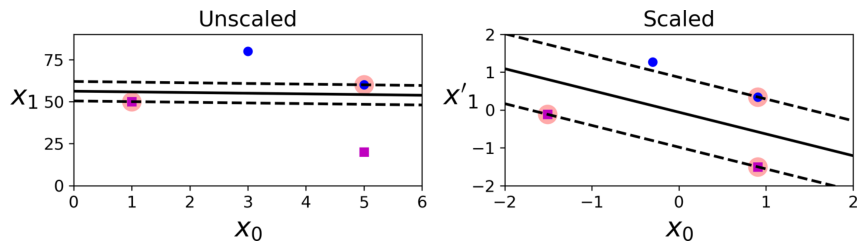

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/2.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

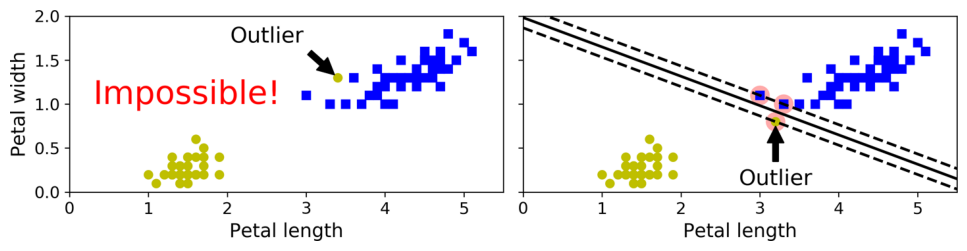

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/3.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

##**Soft Margin Classification**


If we strictly impose that all instances must be off the street and on the right side, this is called hard margin classification. There are two main issues with hard margin classification. First, it only works if the data is linearly separable. Second, it is sensitive to outliers. The above figure shows the iris dataset with just one additional outlier: on the left, it is impossible to find a hard margin; on the right, the decision boundary ends up very different from the one in the Figure below without the outlier, and it will probably not generalize as well. To avoid these issues, we use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called soft margin classification.


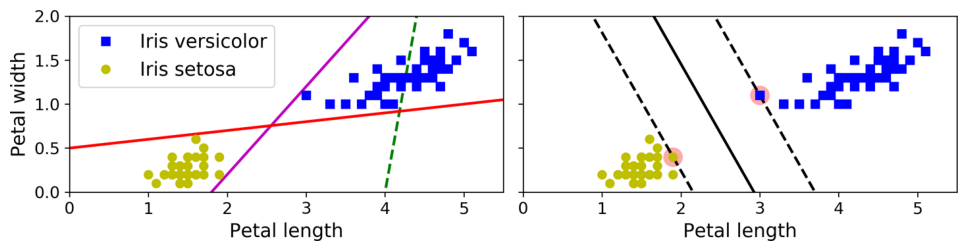

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/4.png')
plt.figure(figsize = (100,3))
plt.axis('off')
plt.imshow(image1);

##**Nonlinear SVM Classification**

Although linear SVM classifiers are efficient and work  well in many cases, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features. In some cases, this can result in a linearly separable dataset. Consider the left plot: it represents a simple dataset with just one feature, ${x_1}$.This dataset is not linearly separable( Figure below=SVM-3). But if you add a second feature  ${x_2} = {({x_1})^2}$ , the resulting 2D dataset is perfectly linearly separable.

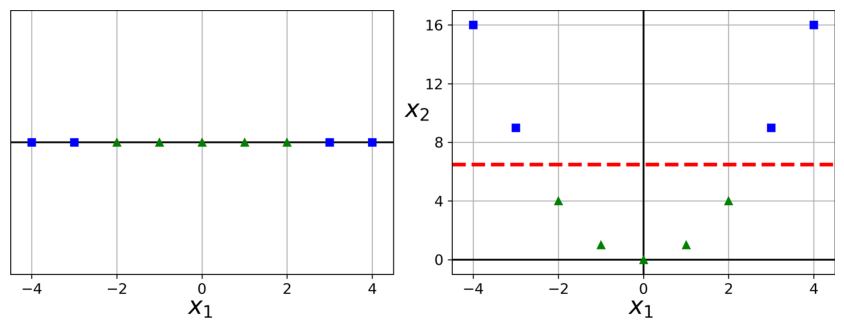

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/5.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

##**Mathematical intuition**

**Decision Boundary with Support Vectors**

The decision boundary(hyperplane) can be represented as:

$$\sum_{i \in SV} \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b = 0
$$
Here:

* SV denotes the set of support vectors.
* b is the bias term

  bias allows the hyperplane to be positioned optimally, not necessarily passing through the origin.

* $α_{i}$ are the Lagrange multipliers.

  They determine the importance of each training point.

* $y_{i}$ are the class labels (±1).

  The $y_{i}$ values are the actual labels of the support vectors. They help in ensuring that the decision boundary correctly classifies the support vectors.

* $K(x_{i},x)$ is the kernel function, which computes the dot product in the transformed feature space.

* Φ($𝑥_{i}$) is the feature mapping of the input vector.

  The goal is to make the data linearly separable in this new feature space, even if it is not in the original space.

These equations ensure that the margin conditions are satisfied for the support vectors. By solving this system, we find the values of $α_{i}$

**Hyperplane Equation**


To find the hyperplane using the alpha parameters in a support vector machine (SVM), we typically use the formula:

$$\mathbf{w}^\intercal \mathbf{x} + b = 0$$

Where:

* 𝑤 is the weight vector.

* 𝑥 is the input vector.

* 𝑏 is the bias term.

The weight vector 𝑤 can be expressed as a linear combination of the support vectors weighted by their corresponding alpha parameters:

$$\mathbf{w} = \sum_{i=1}^{N} \alpha_i \mathbf{x}_i$$

Where:

* 𝑁 is the number of support vectors.

* $\alpha_i$ is the $i_{th}$ alpha parameter.

* $x_i$ is the $i_{th} $support vector.



##**Mathematical example**

**Radial Basis Function(RBF)**

Suppose we are given the following positively labeled data
points in $R^2$:

$$\left\{\binom{2}{2},\binom{2}{-2},\binom{-2}{-2},\binom{-2}{2}\right\}$$

and the following negatively labeled data points in $R^2$:

$$\left\{\binom{1}{1},\binom{1}{-1},\binom{-1}{-1},\binom{-1}{1}\right\}$$

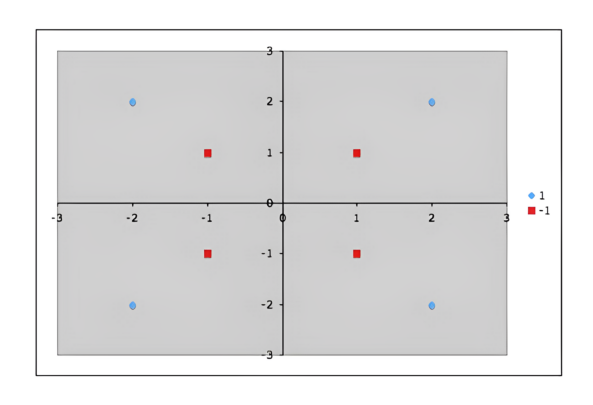

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/16.png')
plt.figure(figsize = (300,5))
plt.axis('off')
plt.imshow(image1);

Our goal, is to discover a separating hyperplane that accurately discriminates the two classes. Of course, it is obvious that no such hyperplane
exists in the input space (that is, in the space in which the original input data
live). Therefore, we must use a nonlinear SVM (that is, one whose mapping
function Φ is a nonlinear mapping from input space into some feature space).
Define:

$$\Phi_1\binom{x_1}{x_2}= \begin{cases}\binom{4-x_2+\left|x_1-x_2\right|}{4-x_1+\left|x_1-x_2\right|} & \text { if } \sqrt{x_1^2+x_2^2}>2 \\ \binom{x_1}{x_2} & \text { otherwise }\end{cases}$$

Therefore, we can rewrite the data in feature space as:

$$\left\{\binom{2}{2},\binom{10}{6},\binom{6}{6},\binom{6}{10}\right\}$$

for the positive examples and

$$\left\{\binom{1}{1},\binom{1}{-1},\binom{-1}{-1},\binom{-1}{1}\right\}$$

for the negative examples

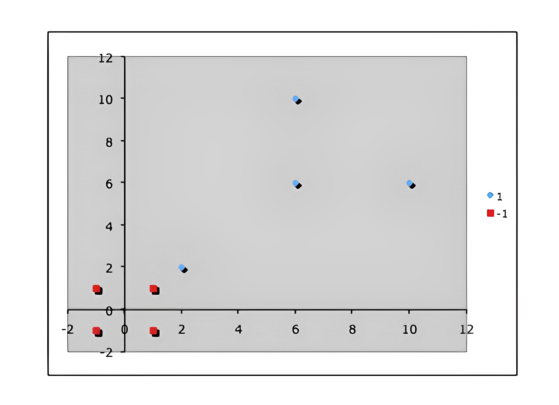

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/17.png')
plt.figure(figsize = (300,5))
plt.axis('off')
plt.imshow(image1);

Now we can easily identify the support vectors:

$$\left\{s_1=\binom{1}{1}, s_2=\binom{2}{2}\right\}$$

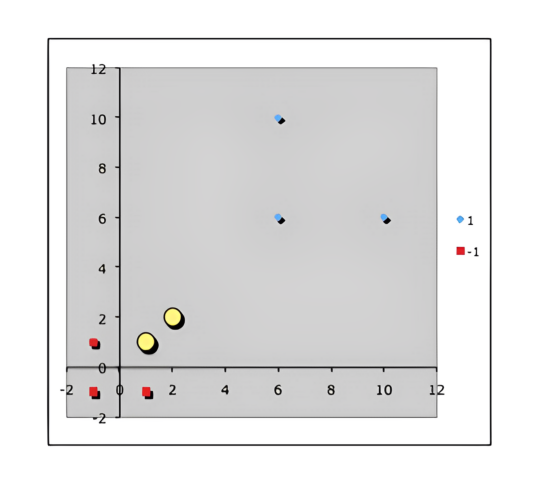

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/18.png')
plt.figure(figsize = (300,6))
plt.axis('off')
plt.imshow(image1);

Then, each vector is augmented with 1 as bias input.

$$\tilde{s}_1 = \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} \quad \tilde{s}_2 = \begin{pmatrix} 2 \\ 2 \\ 1 \end{pmatrix}$$


We use vectors augmented with a 1 as a bias input and will differentiate
them as before. Now given the [augmented] support vectors, we must again find
values for the $α_{i}$ This time our constraints are:

\begin{align*}
\alpha_1 \Phi_1(s_1) \cdot \Phi_1(s_1) + \alpha_2 \Phi_1(s_2) \cdot \Phi_1(s_1) &= -1 \\
\alpha_1 \Phi_1(s_1) \cdot \Phi_1(s_2) + \alpha_2 \Phi_1(s_2) \cdot \Phi_1(s_2) &= +1
\end{align*}

This reduces to:

\begin{align*}
\alpha_1 \tilde{s}_1 \cdot \tilde{s}_1 + \alpha_2 \tilde{s}_2 \cdot \tilde{s}_1 &= -1 \\
\alpha_1 \tilde{s}_1 \cdot \tilde{s}_2 + \alpha_2 \tilde{s}_2 \cdot \tilde{s}_2 &= +1
\end{align*}

Now, computing the dot products results in:

\begin{align*}
3\alpha_1 + 5\alpha_2 &= -1 \\
5\alpha_1 + 9\alpha_2 &= +1
\end{align*}

And the solution to this system of equations is $\alpha_1$ = −7 and $\alpha_2$ = 4.

Finally, we can again look at the discriminating hyperplane in input space
that corresponds to these $\alpha$.

$$\tilde{w} = \sum_{i} \alpha_i \tilde{s}_i$$

$$\tilde{w} = -7\begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} + 4\begin{pmatrix} 2 \\ 2 \\ 1 \end{pmatrix}$$
$$=\begin{pmatrix} 1 \\ 1 \\ -3 \end{pmatrix}$$

giving us the separating hyperplane equation y = wx + b with $w =\begin{pmatrix} 1 \\ 1 \end{pmatrix}$ and b = −3.

Plotting the line gives the expected decision surface

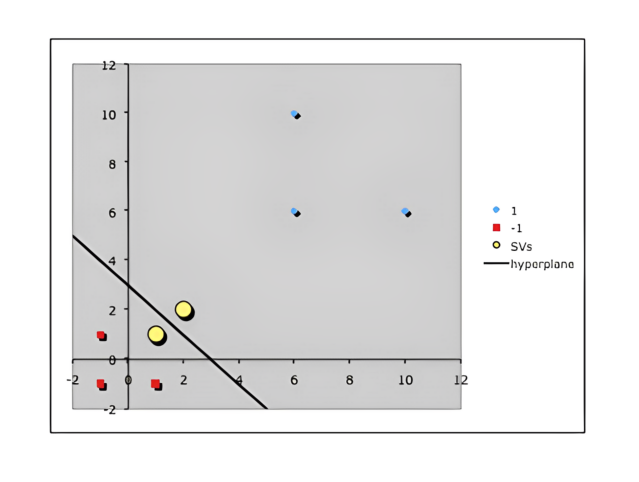

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/19.png')
plt.figure(figsize = (300,6))
plt.axis('off')
plt.imshow(image1);

Source:

https://axon.cs.byu.edu/Dan/678/miscellaneous/SVM.example.pdf

##**Model 1**

###**1.Import libraries.**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC #SVC (Support Vector Classifier)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


###**2. We load our data.**

In [ ]:
dataset = load_iris()
data = dataset.data
target = dataset.target


###**3. We perform preprocessing on our data.**

In [ ]:
sc = StandardScaler()
sc.fit_transform(data)


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

###**4. We do train test split.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.15)

###**5. We train our model.**

In [ ]:
model = SVC()
model.fit(X_train,y_train)


SVC()

###**6. We compute the accuracy score on our test data.**

In [ ]:
accuracy_score(y_test, model.predict(X_test))

1.0

##**Model 2**

###**1.Import libraries.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


###**2. We load our data.**

In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/AI/Assignment/Assignment_2/datasets/final_dataset_ready.csv')
dataset = titanic.copy()
X = np.asarray(dataset.drop('Survived', axis=1))
y = np.asarray(dataset['Survived'])
y[y==0] = -1
X.shape
y[0:10]


array([-1,  1,  1,  1, -1, -1, -1, -1,  1,  1])

###**3. We do train test split.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape
print(X_test.shape,y_test.shape)


(179, 9) (179,)


###**4. We perform preprocessing on our data.**

In [ ]:
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)


###**5. We train our model.**

**C**

The C parameter in SVM allows us to control the trade-off between the margin and misclassifications. A smaller value of C promotes a wider margin but allows more misclassifications, while a larger value of C prioritizes correct classification at the expense of a narrower margin.

**Gamma**

Gamma is a hyperparameter in SVMs that controls the influence of individual training samples on the decision boundary.

High gamma values lead to more complex decision boundaries that can closely fit the training data (potentially overfitting).

Low gamma values result in smoother decision boundaries that generalize better to unseen data (potentially underfitting).

In [ ]:
svmModel = SVC(kernel = 'rbf',C=2,gamma = 0.9)
svmModel.fit(X_train_normalized,y_train)


SVC(C=2, gamma=0.9)

###**6. We use our model to predict our test data.**

In [ ]:
Y_pred = svmModel.predict(X_test_normalized)
print(round(accuracy_score(y_test, Y_pred)*100,2))


80.45


#**Part III**

# **The Gradient-Boosting Algorithm**








##**Mathematical Example**

###**Classification Example**

**What is boosting?**

The principle behind boosting algorithms is first we build a model on the training dataset, then a second model is built to rectify the errors present in the first model.

Gradient-Boosted Tree (GBT) is another tree-based ensemble algorithm similar to Random Forest. GBTs use a technique known as boosting to create a strong learner from weak learners (shallow trees). GBTs train an ensemble of decision trees sequentially, with each succeeding tree decreasing the error of the previous tree. This is done by using the residuals of the previous model to fit the next model. This residual-correction process is performed a set number of iterations with the number of iterations determined by cross-validation until the residuals have been fully minimized.

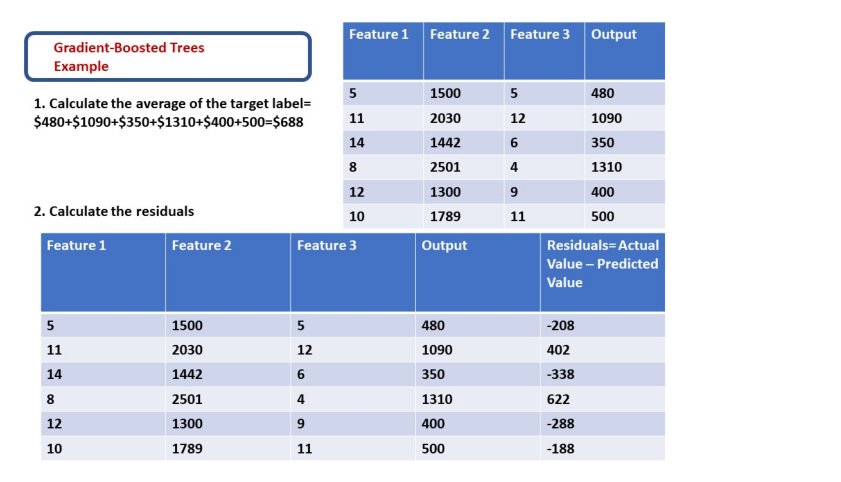

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/6.jpg')
plt.figure(figsize = (100,6))
plt.axis('off')
plt.imshow(image1);

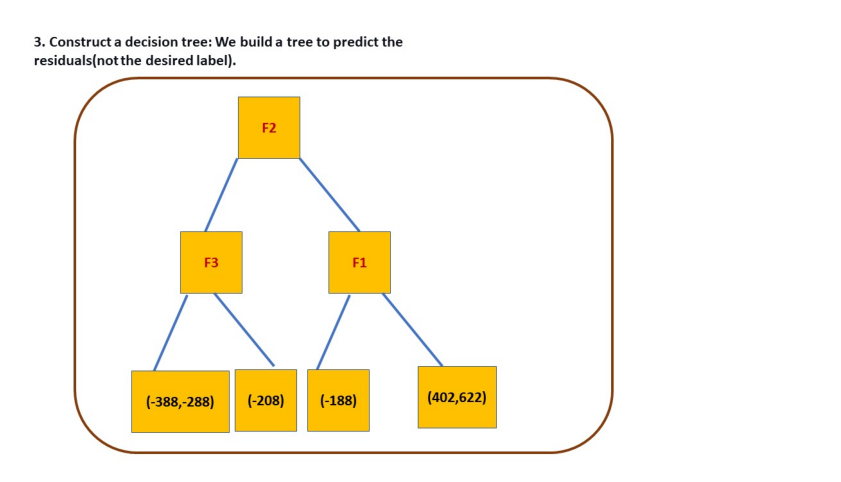

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/7.jpg')
plt.figure(figsize = (100,6))
plt.axis('off')
plt.imshow(image1);

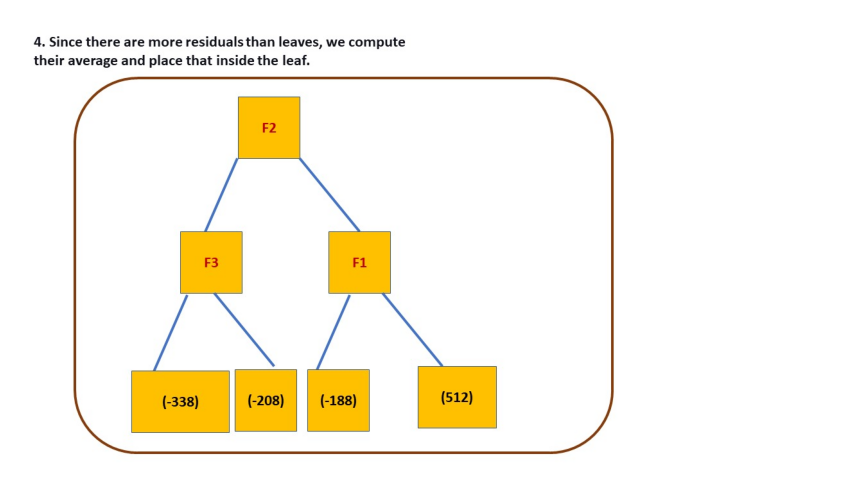

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/8.jpg')
plt.figure(figsize = (100,6))
plt.axis('off')
plt.imshow(image1);

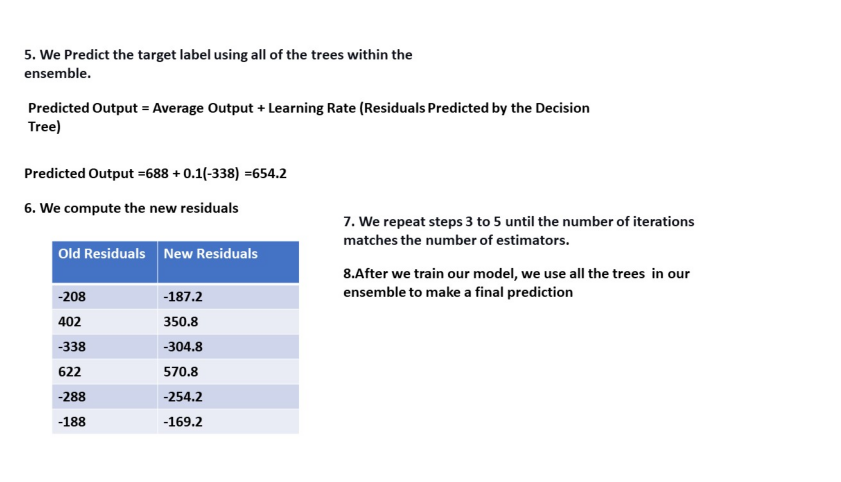

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/9.jpg')
plt.figure(figsize = (100,6))
plt.axis('off')
plt.imshow(image1);

###**Regression Example**

Following is a sample from a random dataset where we have to predict the car price based on various features. The target column is price and other features are independent features.

In [ ]:
df = pd.DataFrame({'Cylinder Number': ['Four', 'Six', 'Five', 'Four'],
                   'Car Height':[48.8, 48.8, 52.4, 54.3],
                   'Engine Location': ['Front', 'Back', 'Back', 'Front'],
                   'Price': [12000, 16500, 15550, 14000]})
df

,Cylinder Number,Car Height,Engine Location,Price
0,Four,48.8,Front,12000
1,Six,48.8,Back,16500
2,Five,52.4,Back,15550
3,Four,54.3,Front,14000


####**Step 1: Build a base model**

The first step in gradient boosting is to build a base model to predict the observations in the training dataset. For simplicity, we take an average of the target column and assume that to be the predicted value as shown below:



In [ ]:
df = pd.DataFrame({'Cylinder Number': ['Four', 'Six', 'Five', 'Four'],
                   'Car Height':[48.8, 48.8, 52.4, 54.3],
                   'Engine Location': ['Front', 'Back', 'Back', 'Front'],
                   'Price': [12000, 16500, 15550, 14000],
                   'Prediction1': [14500, 14500, 14500, 14500]})
df

,Cylinder Number,Car Height,Engine Location,Price,Prediction1
0,Four,48.8,Front,12000,14500
1,Six,48.8,Back,16500,14500
2,Five,52.4,Back,15550,14500
3,Four,54.3,Front,14000,14500


Why we take average of the target column?

Mathematically the first step can be written as:

$$F_0(x) = \underset{\gamma}{\mathrm{arg\,min}} \sum_{i=1}^{n} L(y_i, \gamma).$$

Here

* L is our loss function
* Gamma is our predicted value
* arg min means we have to find a predicted value/gamma for which the loss function is minimum.

Since the target column is continuous our loss function will be:

$$L = \frac{1}{n} \sum_{i=0}^{n} (y_i -\gamma_i)^2$$

Here $y_{i}$ is the observed value, and gamma is the predicted value.

Now we need to find a minimum value of gamma such that this loss function is minimum.

$$\frac{dL}{d\gamma} = -2 \sum_{i=0}^{n} (y_i - \gamma) = - \sum_{i=0}^{n} (y_i - \gamma)$$

Let’s see how to do this with the help of our example.

$\begin{aligned} & L=\frac{1}{2}(12000-\gamma)^2+\frac{1}{2}(16500-\gamma)^2+\frac{1}{2}(15500-\gamma)^2+\frac{1}{2}(14000-\gamma)^2 \\ & \frac{d \mathrm{~L}}{d \gamma}=\frac{2}{2}(12000-\gamma)(-1)+\frac{2}{2}(16500-\gamma)(-1)+\frac{2}{2}(15500-\gamma)(-1)+\frac{2}{2}(14000-\gamma)(-1) \\ & \text { Now } \frac{d \mathrm{~L}}{d \gamma}=0 \text { and taking }(-) \text { common } \\ & \Rightarrow-[12000-\gamma+16500-\gamma+15500-\gamma+14000-\gamma]=0 \\ & \Rightarrow[58000-4 \gamma]=0 \\ & \Rightarrow 58000=4 \gamma \\ & \Rightarrow \gamma=\frac{58000}{4}=14500\end{aligned}$

We end up over an average of the observed car price.

####**Step 2: Compute Pseudo Residuals**

The next step is to calculate the pseudo residuals which are (observed value – predicted value).

In [ ]:
df = pd.DataFrame({'Cylinder Number': ['Four', 'Six', 'Five', 'Four'],
                   'Car Height':[48.8, 48.8, 52.4, 54.3],
                   'Engine Location': ['Front', 'Back', 'Back', 'Front'],
                   'Price': [12000, 16500, 15550, 14000],
                   'Prediction1': [14500, 14500, 14500, 14500],
                   'Residual1': [-2500, 2000, 1000, -500]})
df

,Cylinder Number,Car Height,Engine Location,Price,Prediction1,Residual1
0,Four,48.8,Front,12000,14500,-2500
1,Six,48.8,Back,16500,14500,2000
2,Five,52.4,Back,15550,14500,1000
3,Four,54.3,Front,14000,14500,-500


####**Step 3: Build a Model on Calculated Residuals**

In the next step, we will build a model on these pseudo residuals and make predictions.

####**Step 4: Compute Decision Tree Output**

In this step, we find the output values for each leaf of our decision tree. That means there might be a case where 1 leaf gets more than 1 residual, hence we need to find the final output of all the leaves. To find the output we can simply take the average of all the numbers in a leaf.

Suppose this is our regressor tree:

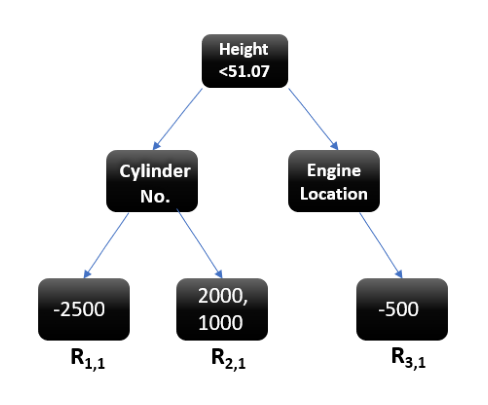

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/20.png')
plt.figure(figsize = (100,5))
plt.axis('off')
plt.imshow(image1);

We see $1^{st}$ residual goes in $R_{1,1}$ ,$2^{nd}$ and $3_{rd}$ residuals go in $R_{2,1}$ and $4_{th}$ residual goes in $R_{3,1}$ .

Let’s calculate the output for the first leave that is $R_{1,1}$:

Here 12000 is our actual price and 14500 is prediction 1. so $\gamma$ value shows how much change should we apply on predicted value.

$$\begin{aligned} & \gamma_{1,1}=\operatorname{argmin} \frac{1}{2}(12000-(14500+\gamma))^2 \\ & \gamma_{1,1}=\operatorname{argmin} \frac{1}{2}(-2500-\gamma)^2\end{aligned}$$

$$\begin{aligned} & \frac{d}{d \gamma} \frac{1}{2}(-2500-\gamma)^2=0 \\ & -2500-\gamma=0 \\ & \gamma=-2500\end{aligned}$$

Hence the leaf $R_{1,1}$ has an output value of -2500.

Now let’s solve for the $R_{2,1}$.

$$\begin{aligned} \gamma_{2,1} & =\operatorname{argmin}\left[\frac{1}{2}(16500-(14500+\gamma))^2+\frac{1}{2}(15500-(14500+\gamma))^2\right] \\ \gamma_{2,1} & =\operatorname{argmin}\left[\frac{1}{2}(2000-\gamma)^2+\frac{1}{2}(1000-\gamma)^2\right]\end{aligned}$$

$$\begin{aligned} & \frac{d}{d \gamma}\left[\frac{1}{2}(2000-\gamma)^2+\frac{1}{2}(1000-\gamma)^2\right]=0 \\ & 2000-\gamma+1000-\gamma=0 \\ & 3000-2 \gamma=0 \\ & \frac{3000}{2}=\gamma \\ & \gamma=1500\end{aligned}$$

We end up with the average of the residuals in the leaf $R_{2,1}$ . Hence if we get any leaf with more than 1 residual, we can simply find the average of that leaf and that will be our final output.

Now after calculating the output of all the leaves, we get:

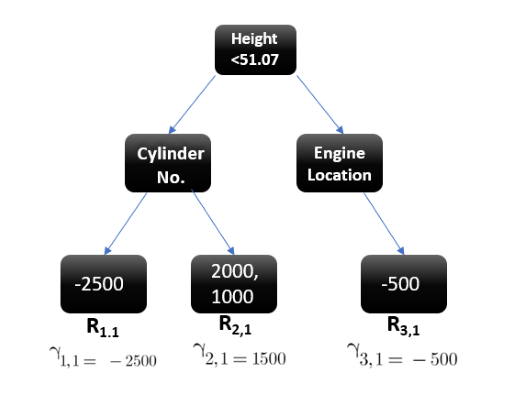

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/21.png')
plt.figure(figsize = (100,5))
plt.axis('off')
plt.imshow(image1);

####**Step 5: Update Previous Model Predictions**

This is finally the last step where we have to update the predictions of the previous model. It can be updated as:

$$F_m(x)=F_{m-1}(x)+\nu_m h_m(x)$$

where m is the number of decision trees made.

Since we have just started building our model so our m=1.

Now to make a new DT our new predictions will be:

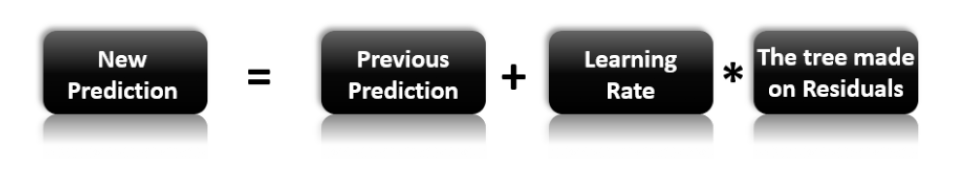

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/22.png')
plt.figure(figsize = (100,2))
plt.axis('off')
plt.imshow(image1);

Here $F_{m-1}(x)$ is the prediction of the base model (previous prediction) since $F_{1-1=0}$ , $F_{0}$ is our base model hence the previous prediction is 14500.

$v_{m}$ is the learning rate that is usually selected between 0-1. It reduces the effect each tree has on the final prediction, and this improves accuracy in the long run. Let’s take $v_{m}$=0.1 in this example.

$h_{m}(x)$ is the DT made on residuals and m is the number of DT.

Let’s calculate the new prediction now:

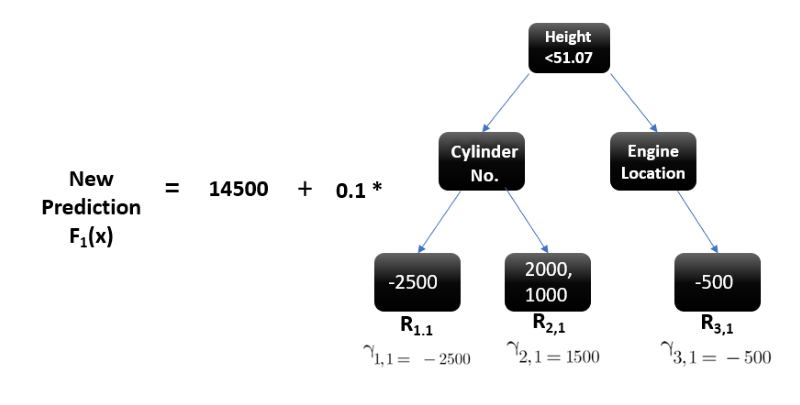

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/23.png')
plt.figure(figsize = (100,5))
plt.axis('off')
plt.imshow(image1);

Now use new prediction, we can calculate new residual values.

 We will iterate through these steps again and again till the loss is negligible.

Source:

https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/

##**Code Example**

###**1.Import the necessary libraries for Gradient-Boosted Tree**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1)


In [ ]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

###**2.We do train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

###**3. We use two nodes with three decision trees in GradientBoostingRegressor**

In [ ]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

###**4. We compute the errors and the best estimators.**

The variable best_n_estimators  represents the optimal number of estimators (trees) for the Gradient Boosting Regressor model.

By setting max_depth, you control how deep the tree can grow during training.

In [ ]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

In [ ]:
best_n_estimators

2

###**5. We use the best estimators and create our model.**




In [ ]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,

    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2)

###**6. We predict our test set**


In [ ]:
y_pred = best_regressor.predict(X_test)

###**7. compute the mean absolute error.**

In [ ]:
mean_absolute_error(y_test, y_pred)

2.9194739848418387

# **Part IV**
#**Extreme Gradient Boosting(XGBoost)Algorithm**

XGBoost is one of the best gradient-boosted tree implementations currently available. Released on March 27, 2014, by Tianqi Chen as a research project, XGBoost has become the dominant machine learning algorithm for classification and regression.

XGBoost was designed using the general principles of gradient boosting, combining weak learners into a strong learner. But while gradient-boosted trees are built sequentially – slowly learning from data to improve its prediction in succeeding iteration, XGBoost builds trees in parallel.

XGBoost produces better prediction performance by controlling model complexity and reducing overfitting through its built-in regularization.

XGBoost uses an approximate algorithm to find split points when finding the best split points for a continuous feature.

Instead of exhaustively searching all possible split points, which can be computationally expensive, XGBoost employs a more efficient approach. The approximate splitting method involves creating discrete bins (buckets) for continuous features.Each bin represents a range of feature values. For example, if we have a continuous feature like “age,” we can create bins like “0-10,” “11-20,” and so on. By using discrete bins, XGBoost significantly speeds up the process of finding split points.

XGBoost includes another tree growing method using a histogram-based algorithm which provides an even more efficient method of bucketing continuous features into discrete bins. But while the approximate method creates a new set of bins per iteration, the histogram-based approach reuses bins over multiple iterations.

This approach allows for additional optimizations that are not achievable with the approximate method, such as the ability to cache bins and parent and sibling histogram subtraction.

When constructing decision trees, XGBoost builds histograms of feature values for each node. These histograms help determine the best splits.

To optimize sorting operations, XGBoost stores sorted data in in-memory units of blocks. Sorting blocks can be efficiently distributed and performed by parallel CPU cores. XGBoost can effectively handle weighted data via its weighted quantile sketch algorithm, can efficiently handle sparse data, is cache-aware, and supports out-of-core computing by utilizing disk space for large datasets, so data does not have to fit in memory.

##**Mathematical Example**

Consider the following data where the years of experience is predictor variable and salary (in thousand dollars) is the target. Using regression trees as base learners, we can create an ensemble model to predict the salary. For the sake of simplicity, we can choose square loss as our loss function and our objective would be to minimize the square error.

In [ ]:
df = pd.DataFrame({'Years': [5, 7, 12, 23, 25, 28, 29, 34, 35, 40],
                   'Salary': [82, 80, 103, 118, 172, 127, 204, 189, 99, 166]})
df

,Years,Salary
0,5,82
1,7,80
2,12,103
3,23,118
4,25,172
5,28,127
6,29,204
7,34,189
8,35,99
9,40,166


As the first step, the model should be initialized with a function $F_{0}(x)$. $F_{0}(x)$ should be a function which minimizes the loss function or MSE (mean squared error), in this case:

$$\begin{gathered}F_0(x)=\operatorname{argmin}_\gamma \sum_{i=1}^n L\left(y_i, \gamma\right) \\ \operatorname{argmin}_\gamma \sum_{i=1}^n L\left(y_i, \gamma\right)=\operatorname{argmin}_\gamma \sum_{i=1}^n\left(y_i-\gamma\right)^2\end{gathered}$$

$$F_0(x)=\frac{\sum_1^n y_i}{n}$$

$F_{0}(x)$ gives the predictions from the first stage of our model. Now, the residual error for each instance is ($y_{i}$ – $F_{0}(x)$).



In [ ]:
df = pd.DataFrame({'Years': [5, 7, 12, 23, 25, 28, 29, 34, 35, 40],
                   'Salary': [82, 80, 103, 118, 172, 127, 204, 189, 99, 166],
                   'F0': [134, 134, 134, 134, 134, 134, 134, 134, 134, 134],
                   'y - F0': [-52, -54, -31, -16, 38, -7, 70, 55, -35, 32]})
df

,Years,Salary,F0,y - F0
0,5,82,134,-52
1,7,80,134,-54
2,12,103,134,-31
3,23,118,134,-16
4,25,172,134,38
5,28,127,134,-7
6,29,204,134,70
7,34,189,134,55
8,35,99,134,-35
9,40,166,134,32


We can use the residuals from $F_{0}(x)$ to create $h_{1}(x)$. $h_{1}(x)$ will be a regression tree which will try and reduce the residuals from the previous step. The output of $h_{1}(x)$ won’t be a prediction of y; instead, it will help in predicting the successive function $F_{1}(x)$ which will bring down the residuals.

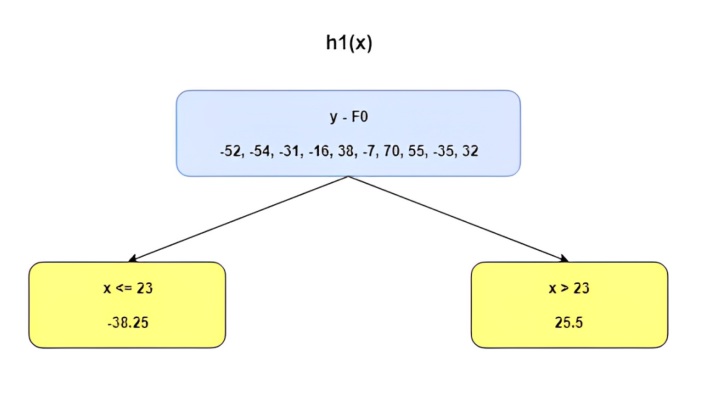

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/24.png')
plt.figure(figsize = (100,5))
plt.axis('off')
plt.imshow(image1);

The additive model $h_{1}(x)$ computes the mean of the residuals (y – $F_{0}(x)$) at each leaf of the tree. The boosted function $F_{1}(x)$ is obtained by summing $F_{0}(x)$ and $h_{1}(x)$. This way $h_{1}(x)$ learns from the residuals of $F_{0}(x)$ and suppresses it in $F_{1}(x)$.



In [ ]:
df = pd.DataFrame({'Years': [5, 7, 12, 23, 25, 28, 29, 34, 35, 40],
                   'Salary': [82, 80, 103, 118, 172, 127, 204, 189, 99, 166],
                   'F0': [134, 134, 134, 134, 134, 134, 134, 134, 134, 134],
                   'y - F0': [-52, -54, -31, -16, 38, -7, 70, 55, -35, 32],
                   'h1': [-38.25, -38.25, -38.25, -38.25, 25.50, 25.50, 25.50, 25.50, 25.50, 25.50],
                   'F1': [95.75, 95.75, 95.75, 95.75, 159.50, 159.50, 159.50, 159.50, 159.50, 159.50]})
df

,Years,Salary,F0,y - F0,h1,F1
0,5,82,134,-52,-38.25,95.75
1,7,80,134,-54,-38.25,95.75
2,12,103,134,-31,-38.25,95.75
3,23,118,134,-16,-38.25,95.75
4,25,172,134,38,25.50,159.50
5,28,127,134,-7,25.50,159.50
6,29,204,134,70,25.50,159.50
7,34,189,134,55,25.50,159.50
8,35,99,134,-35,25.50,159.50
9,40,166,134,32,25.50,159.50


This can be repeated for 2 more iterations to compute $h_{2}(x)$ and $h_{3}(x)$. Each of these additive learners, $h_{m}(x)$, will make use of the residuals from the preceding function, $F_{m-1}(x)$.

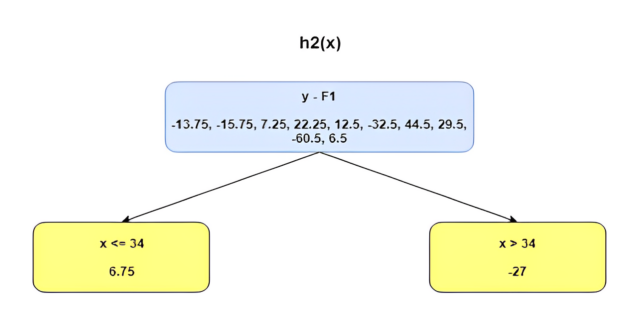

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/25.png')
plt.figure(figsize = (100,4))
plt.axis('off')
plt.imshow(image1);

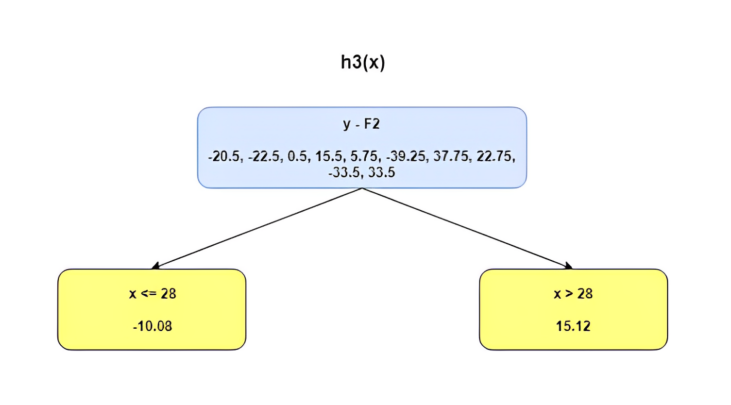

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Assignment/Assignment_2/images/26.png')
plt.figure(figsize = (100,5))
plt.axis('off')
plt.imshow(image1);

##**Code Example**

###**Import the necessary libraries for XGBoost Example**

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

###**2. Import the data**


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI/Assignment/Assignment_2/datasets/Telcom.csv')


In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


###**3. Data exploration**

In [ ]:
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'],
        axis=1, inplace=True)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df['Count'].unique()

array([1])

In [ ]:
df['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
df['State'].unique()

array(['California'], dtype=object)

In [ ]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [ ]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'],
        axis=1, inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df['City'].replace(' ', '_', regex=True, inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [ ]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

In [ ]:
len(df.loc[df['Total_Charges'] == ' '])

11

In [ ]:
df.loc[df['Total_Charges'] == ' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [ ]:
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

In [ ]:
df.loc[df['Tenure_Months'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [ ]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [ ]:
df.replace(' ', '_', regex=True, inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [ ]:
df.size

169032

###**4. Split our data**


In [ ]:
X = df.drop('Churn_Value', axis=1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [ ]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

###**5. We format the data with One-Hot Encoding**



In [ ]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

In [ ]:
pd.get_dummies(X, columns=['Payment_Method']).head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,False,False,False,True
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,False,False,True,False
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,False,False,True,False
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,False,False,True,False
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,True,False,False,False


In [ ]:
X_encoded = pd.get_dummies(X, columns=['City',
                                       'Gender',
                                       'Senior_Citizen',
                                       'Partner',
                                       'Dependents',
                                       'Phone_Service',
                                       'Multiple_Lines',
                                       'Internet_Service',
                                       'Online_Security',
                                       'Online_Backup',
                                       'Device_Protection',
                                       'Tech_Support',
                                       'Streaming_TV',
                                       'Streaming_Movies',
                                       'Contract',
                                       'Paperless_Billing',
                                       'Payment_Method'])
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,90005,34.059281,-118.307420,2,70.70,151.65,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,90006,34.048013,-118.293953,8,99.65,820.50,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
3,90010,34.062125,-118.315709,28,104.80,3046.05,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,90015,34.039224,-118.266293,49,103.70,5036.30,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

###**6.We Optimize our hyperparameters by Cross-Validation and GridSearch.**


* max_depth parameter controls the maximum depth of each tree in the ensemble.

  A higher value allows the model to learn more complex relationships in the data, but it can also lead to overfitting.

* gamma parameter controls the minimum loss reduction required to make a further partition on a leaf node of the tree.

* reg_lambda is the L2 regularization term on weights.

* scale_pos_weight parameter is specific to the XGBoost algorithm and is used to address class imbalance in binary classification problems.

* objective='binary:logistic' parameter in XGBoost specifies the loss function used during training for binary classification problems.

* subsample parameter controls the subsample ratio of the training instances used for constructing each tree in the ensemble.

* colsample_bytree parameter controls the subsample ratio of columns (features) when constructing each tree in the ensemble.

* early_stopping_rounds parameter is used to implement early stopping during the boosting process.
Its primary goal is to monitor the model’s performance on a validation dataset and stop training when the performance stops improving.

* n_jobs parameter determines how many CPU cores or threads XGBoost can utilize for parallel computation.

 * cv parameter refers to the number of cross-validation folds used during hyperparameter tuning.

In [ ]:
param_grid = {
     'max_depth': [4],
     'learning_rate': [0.1, 0.5, 0.08],
     'gamma': [0.25],
     'reg_lambda': [10.0, 20, 100],
      'scale_pos_weight': [3]}

optimal_params = GridSearchCV(
     estimator=xgb.XGBClassifier(objective='binary:logistic',
                                 eval_metric="logloss",   #croos entropy loss
                                 seed=42,
                                 subsample=0.9,
                                 colsample_bytree=0.5,
                                 early_stopping_rounds=8,
                                 use_label_encoder=False),
     param_grid=param_grid,
     scoring='roc_auc',
     verbose=0,
     n_jobs = 10,
     cv = 3,
 )

In [ ]:
optimal_params.fit(X_train,
                    y_train,
                    eval_set=[(X_test, y_test)],
                    verbose=False)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=8,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0.25], 'learning_rate': [0.1, 0.5, 0.08],
                         'max_depth': [4], 'reg_lambda': [10.0, 20, 100],
                         'scale_pos_weight': [3]},
             scoring='roc_auc')

In [ ]:
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.08, 'max_depth': 4, 'reg_lambda': 20, 'scale_pos_weight': 3}


Our best hyperparameters:

gamma: 0.25

learning_rate : 0.08

max_depth: 4

reg_lambda: 10.0

scale_pos_weight: 3

###**7. We now build our XGBoost Model**



In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss",
                        gamma=0.25,
                        learning_rate=0.08,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False,
                         early_stopping_rounds=20,
)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68630
[1]	validation_0-logloss:0.66350
[2]	validation_0-logloss:0.64398
[3]	validation_0-logloss:0.62728
[4]	validation_0-logloss:0.61220
[5]	validation_0-logloss:0.59792
[6]	validation_0-logloss:0.58653
[7]	validation_0-logloss:0.57550
[8]	validation_0-logloss:0.56556
[9]	validation_0-logloss:0.55727
[10]	validation_0-logloss:0.54993
[11]	validation_0-logloss:0.54230
[12]	validation_0-logloss:0.53664
[13]	validation_0-logloss:0.53125
[14]	validation_0-logloss:0.52638
[15]	validation_0-logloss:0.52223
[16]	validation_0-logloss:0.51904
[17]	validation_0-logloss:0.51538
[18]	validation_0-logloss:0.51144
[19]	validation_0-logloss:0.50800
[20]	validation_0-logloss:0.50526
[21]	validation_0-logloss:0.50258
[22]	validation_0-logloss:0.49981
[23]	validation_0-logloss:0.49764
[24]	validation_0-logloss:0.49547
[25]	validation_0-logloss:0.49398
[26]	validation_0-logloss:0.49244
[27]	validation_0-logloss:0.49066
[28]	validation_0-logloss:0.48915
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

###**8. We test our XGBoost Model**

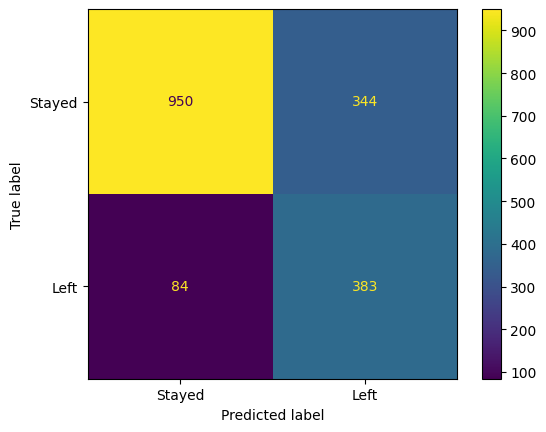

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_xgb,
                      X_test,
                      y_test,
                     values_format='d',
                      display_labels=["Stayed", "Left"])

In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 10.7 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss",
                        gamma=0.25,
                        learning_rate=0.08,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False,
                        early_stopping_rounds=10,
                            )
clf_xgb.fit(X_train,
            y_train,
            verbose=True,


            eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68630
[1]	validation_0-logloss:0.66350
[2]	validation_0-logloss:0.64398
[3]	validation_0-logloss:0.62728
[4]	validation_0-logloss:0.61220
[5]	validation_0-logloss:0.59792
[6]	validation_0-logloss:0.58653
[7]	validation_0-logloss:0.57550
[8]	validation_0-logloss:0.56556
[9]	validation_0-logloss:0.55727
[10]	validation_0-logloss:0.54993
[11]	validation_0-logloss:0.54230
[12]	validation_0-logloss:0.53664
[13]	validation_0-logloss:0.53125
[14]	validation_0-logloss:0.52638
[15]	validation_0-logloss:0.52223
[16]	validation_0-logloss:0.51904
[17]	validation_0-logloss:0.51538
[18]	validation_0-logloss:0.51144
[19]	validation_0-logloss:0.50800
[20]	validation_0-logloss:0.50526
[21]	validation_0-logloss:0.50258
[22]	validation_0-logloss:0.49981
[23]	validation_0-logloss:0.49764
[24]	validation_0-logloss:0.49547
[25]	validation_0-logloss:0.49398
[26]	validation_0-logloss:0.49244
[27]	validation_0-logloss:0.49066
[28]	validation_0-logloss:0.48915
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
explainer = shap.Explainer(clf_xgb)
shap_values = explainer(X_test)

###**9.The most important features**

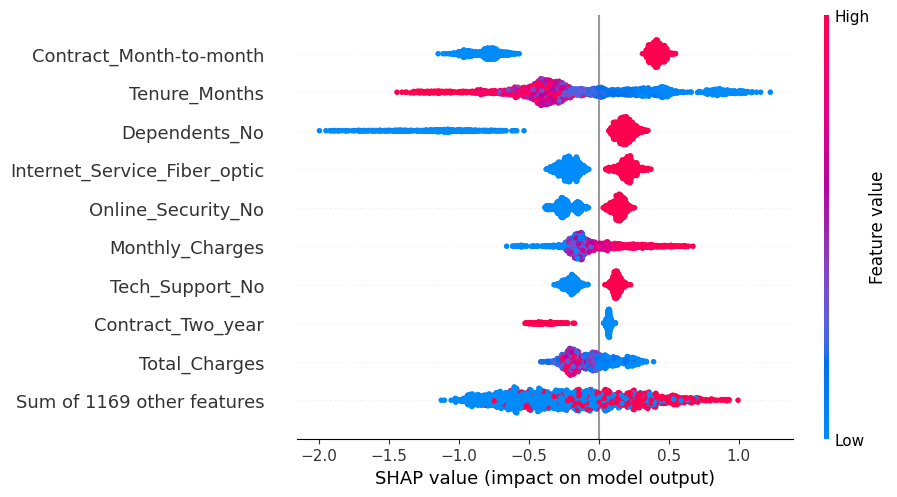

In [ ]:
shap.plots.beeswarm(shap_values)

##**References:**
##**[1].Data Structures, Algorithms, and Machine Learning Optimization, Jon Krohn-June 2021.**
##**[2]. Machine Learning With Go, Daniel Whitenack- September 2017.**
##**[3].Machine Learning with scikit-learn Quick Start Guide, Kevin Jolly-October 2018.**
#**[4].GitHub**

